## Libraries

In [1]:
import tensorflow as tf

import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

import os 
from PIL import Image

## Images 

Each image is a 28 by 28 grayscale image of a handwritten digit. There are 60000 images in the training set. 

In [2]:
# load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# scale data between 0 to 1
x_train = x_train / 255
x_test = x_test / 255

In [3]:
x_train.shape

(60000, 28, 28)

## View Data

Let's plot a few of the images to see what they look like.

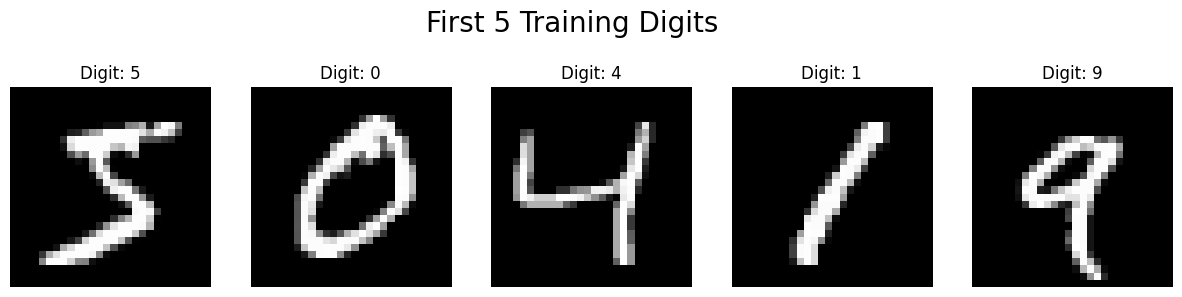

In [4]:
fig, axs = plt.subplots(figsize=(15, 5), ncols=5)
fig.suptitle('First 5 Training Digits', fontsize=20, y=0.85)
for i in range(5): 
    axs[i].set_axis_off()
    axs[i].imshow(x_train[i], cmap='gray')
    axs[i].set_title('Digit: ' + str(y_train[i]))
plt.show()

## Neural Network

My first model will be a simple sequential model with dense layers. 

In [5]:
# create model
simple_model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'), 
    tf.keras.layers.Dense(units=10) 
])

In [6]:
# compile model
simple_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits='True'),
    metrics=['accuracy']
)

In [7]:
# fit model
history = simple_model.fit(x_train, y_train, batch_size=15, epochs=15, validation_split=0.1, verbose=2)

Epoch 1/15
3600/3600 - 20s - 5ms/step - accuracy: 0.9317 - loss: 0.2246 - val_accuracy: 0.9627 - val_loss: 0.1220
Epoch 2/15
3600/3600 - 16s - 4ms/step - accuracy: 0.9675 - loss: 0.1078 - val_accuracy: 0.9720 - val_loss: 0.0929
Epoch 3/15
3600/3600 - 18s - 5ms/step - accuracy: 0.9770 - loss: 0.0769 - val_accuracy: 0.9767 - val_loss: 0.0801
Epoch 4/15
3600/3600 - 23s - 6ms/step - accuracy: 0.9806 - loss: 0.0607 - val_accuracy: 0.9758 - val_loss: 0.0797
Epoch 5/15
3600/3600 - 20s - 6ms/step - accuracy: 0.9835 - loss: 0.0534 - val_accuracy: 0.9790 - val_loss: 0.0800
Epoch 6/15
3600/3600 - 21s - 6ms/step - accuracy: 0.9869 - loss: 0.0422 - val_accuracy: 0.9793 - val_loss: 0.0801
Epoch 7/15
3600/3600 - 20s - 5ms/step - accuracy: 0.9885 - loss: 0.0358 - val_accuracy: 0.9752 - val_loss: 0.1081
Epoch 8/15
3600/3600 - 21s - 6ms/step - accuracy: 0.9899 - loss: 0.0333 - val_accuracy: 0.9803 - val_loss: 0.0869
Epoch 9/15
3600/3600 - 19s - 5ms/step - accuracy: 0.9907 - loss: 0.0302 - val_accuracy: 

## Model is overfitting 

The training accuracy is higher than validation accuracy after around 3 epochs.

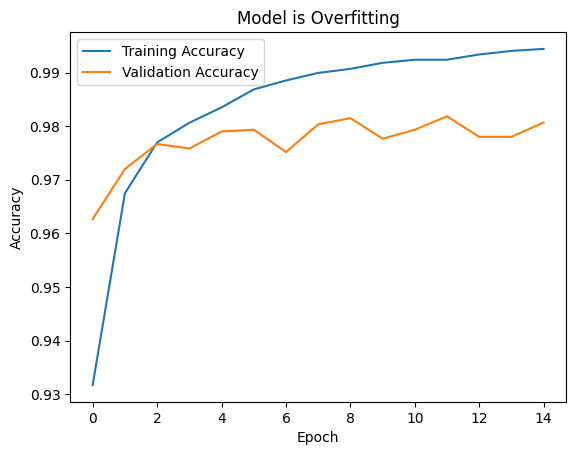

In [8]:
plt.title('Model is Overfitting')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Attempt 2

To help with overfitting, I am removing units from dense layers, removing a dense layers, adding dropout layers, and decreasing the learning rate. I also altered the batch size and number of epochs to see what worked well. 

In [7]:
simple_model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(units=32, activation='relu'), 
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(units=10) 
])

simple_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits='True'),
    metrics=['accuracy']
)

In [8]:
history = simple_model.fit(x_train, y_train, batch_size=10, epochs=25, validation_split=0.1, verbose=2)

Epoch 1/25
5400/5400 - 22s - 4ms/step - accuracy: 0.7885 - loss: 0.7165 - val_accuracy: 0.9308 - val_loss: 0.2555
Epoch 2/25
5400/5400 - 22s - 4ms/step - accuracy: 0.8996 - loss: 0.3438 - val_accuracy: 0.9480 - val_loss: 0.1853
Epoch 3/25
5400/5400 - 21s - 4ms/step - accuracy: 0.9220 - loss: 0.2698 - val_accuracy: 0.9570 - val_loss: 0.1538
Epoch 4/25
5400/5400 - 20s - 4ms/step - accuracy: 0.9322 - loss: 0.2302 - val_accuracy: 0.9598 - val_loss: 0.1343
Epoch 5/25
5400/5400 - 19s - 4ms/step - accuracy: 0.9398 - loss: 0.2030 - val_accuracy: 0.9633 - val_loss: 0.1221
Epoch 6/25
5400/5400 - 22s - 4ms/step - accuracy: 0.9463 - loss: 0.1819 - val_accuracy: 0.9673 - val_loss: 0.1102
Epoch 7/25
5400/5400 - 21s - 4ms/step - accuracy: 0.9501 - loss: 0.1681 - val_accuracy: 0.9675 - val_loss: 0.1055
Epoch 8/25
5400/5400 - 23s - 4ms/step - accuracy: 0.9535 - loss: 0.1546 - val_accuracy: 0.9708 - val_loss: 0.0999
Epoch 9/25
5400/5400 - 19s - 4ms/step - accuracy: 0.9573 - loss: 0.1421 - val_accuracy: 

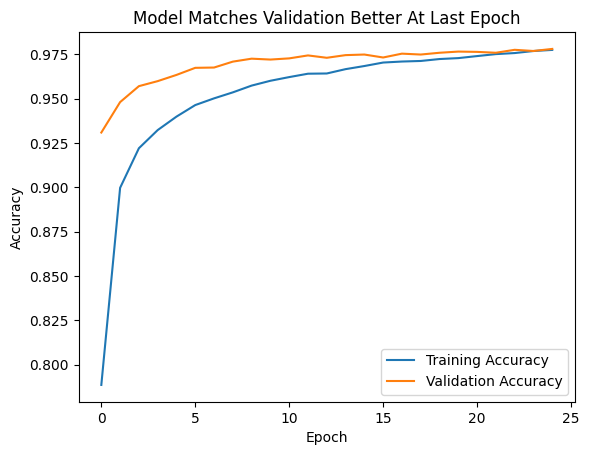

In [9]:
plt.title('Model Matches Validation Better At Last Epoch')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Testing the Model

Fitting on all data and evaluating with test data.

In [12]:
simple_model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(units=32, activation='relu'), 
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(units=10) 
])
simple_model.summary()

simple_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits='True'),
    metrics=['accuracy']
)



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,650 (205.66 KB)

 Trainable params: 52,650 (205.66 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
simple_model.fit(x_train, y_train, batch_size=10, epochs=23, verbose=2)

Epoch 1/23
6000/6000 - 20s - 3ms/step - accuracy: 0.8012 - loss: 0.6707
Epoch 2/23
6000/6000 - 20s - 3ms/step - accuracy: 0.9075 - loss: 0.3169
Epoch 3/23
6000/6000 - 21s - 3ms/step - accuracy: 0.9272 - loss: 0.2519
Epoch 4/23
6000/6000 - 21s - 4ms/step - accuracy: 0.9363 - loss: 0.2176
Epoch 5/23
6000/6000 - 20s - 3ms/step - accuracy: 0.9437 - loss: 0.1914
Epoch 6/23
6000/6000 - 18s - 3ms/step - accuracy: 0.9495 - loss: 0.1735
Epoch 7/23
6000/6000 - 19s - 3ms/step - accuracy: 0.9544 - loss: 0.1570
Epoch 8/23
6000/6000 - 18s - 3ms/step - accuracy: 0.9569 - loss: 0.1468
Epoch 9/23
6000/6000 - 16s - 3ms/step - accuracy: 0.9607 - loss: 0.1329
Epoch 10/23
6000/6000 - 21s - 3ms/step - accuracy: 0.9623 - loss: 0.1266
Epoch 11/23
6000/6000 - 17s - 3ms/step - accuracy: 0.9639 - loss: 0.1183
Epoch 12/23
6000/6000 - 20s - 3ms/step - accuracy: 0.9661 - loss: 0.1118
Epoch 13/23
6000/6000 - 21s - 3ms/step - accuracy: 0.9679 - loss: 0.1062
Epoch 14/23
6000/6000 - 21s - 3ms/step - accuracy: 0.9701 - 

Final accuracy around 97.5%

In [14]:
predictions = tf.nn.softmax(simple_model.predict(x_test)).numpy().argmax(axis=-1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [15]:
print('Accuracy:', accuracy_score(y_true=y_test, y_pred=predictions))
cm = confusion_matrix(y_true=y_test, y_pred=predictions)


Accuracy: 0.9741


We can also see from the confusion matrix that the model is mistaking 9s for 4s and 5s for 3s.

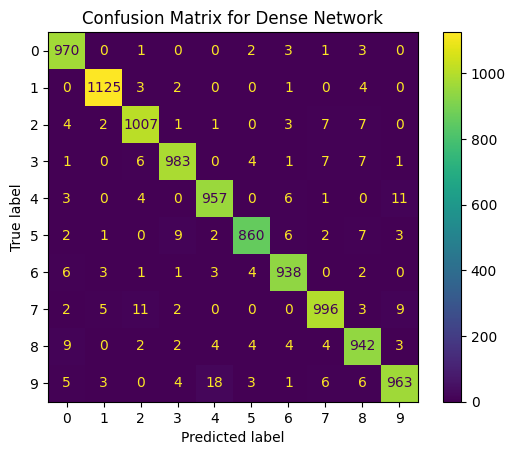

In [16]:
ConfusionMatrixDisplay(cm).plot()
plt.title('Confusion Matrix for Dense Network')
plt.show()

## Convolutional Neural Network

We are going to create a new model with convolution layers to pick up on patterns in the images better. For a convolution layer, we need to add a dimension for channels. In this case there is only one channel since the images are grayscale. 

In [10]:
x_train_expanded = np.expand_dims(x_train, axis=-1)
x_test_expanded = np.expand_dims(x_test, axis=-1)



In [161]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Conv2D(filters=8, kernel_size=(5, 5), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(units=10)
])

In [162]:
conv_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits='True'),
    metrics=['accuracy']
)

In [163]:
history = conv_model.fit(x_train_expanded, y_train, batch_size=30, epochs=15, validation_split=0.1, verbose=2)

Epoch 1/15
1800/1800 - 35s - 19ms/step - accuracy: 0.8501 - loss: 0.5110 - val_accuracy: 0.9683 - val_loss: 0.1236
Epoch 2/15
1800/1800 - 30s - 17ms/step - accuracy: 0.9543 - loss: 0.1602 - val_accuracy: 0.9795 - val_loss: 0.0752
Epoch 3/15
1800/1800 - 29s - 16ms/step - accuracy: 0.9691 - loss: 0.1055 - val_accuracy: 0.9838 - val_loss: 0.0595
Epoch 4/15
1800/1800 - 29s - 16ms/step - accuracy: 0.9755 - loss: 0.0827 - val_accuracy: 0.9850 - val_loss: 0.0518
Epoch 5/15
1800/1800 - 26s - 14ms/step - accuracy: 0.9805 - loss: 0.0670 - val_accuracy: 0.9870 - val_loss: 0.0446
Epoch 6/15
1800/1800 - 15s - 9ms/step - accuracy: 0.9830 - loss: 0.0581 - val_accuracy: 0.9857 - val_loss: 0.0471
Epoch 7/15
1800/1800 - 13s - 7ms/step - accuracy: 0.9847 - loss: 0.0512 - val_accuracy: 0.9885 - val_loss: 0.0387
Epoch 8/15
1800/1800 - 12s - 7ms/step - accuracy: 0.9864 - loss: 0.0460 - val_accuracy: 0.9860 - val_loss: 0.0465
Epoch 9/15
1800/1800 - 15s - 9ms/step - accuracy: 0.9874 - loss: 0.0404 - val_accur

This model appears to not be overfitting.

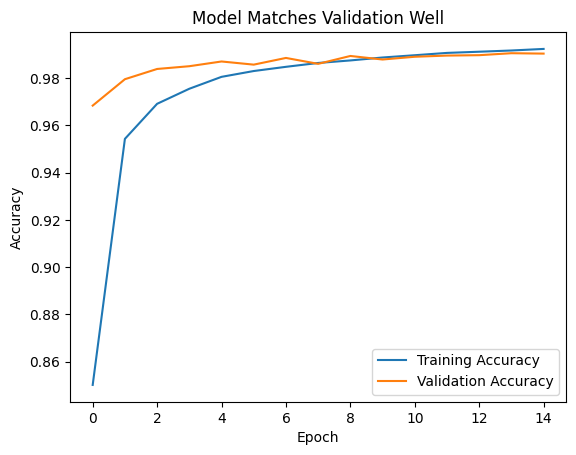

In [164]:
plt.title('Model Matches Validation Well')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Testing

I will train on all the data and evaluate the accuracy from the test data.

In [11]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Conv2D(filters=8, kernel_size=(5, 5), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(units=10)
])
conv_model.summary()

conv_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits='True'),
    metrics=['accuracy']
)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 16)          │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 8)           │           3,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 392)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          50,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 63,602 (248.45 KB)

 Trainable params: 63,218 (246.95 KB)

 Non-trainable params: 384 (1.50 KB)

In [12]:
conv_model.fit(x_train_expanded, y_train, batch_size=30, epochs=15, verbose=2)

Epoch 1/15
2000/2000 - 29s - 14ms/step - accuracy: 0.8629 - loss: 0.4742
Epoch 2/15
2000/2000 - 24s - 12ms/step - accuracy: 0.9598 - loss: 0.1425
Epoch 3/15
2000/2000 - 21s - 11ms/step - accuracy: 0.9721 - loss: 0.0971
Epoch 4/15
2000/2000 - 30s - 15ms/step - accuracy: 0.9783 - loss: 0.0753
Epoch 5/15
2000/2000 - 25s - 13ms/step - accuracy: 0.9821 - loss: 0.0622
Epoch 6/15
2000/2000 - 23s - 11ms/step - accuracy: 0.9839 - loss: 0.0545
Epoch 7/15
2000/2000 - 23s - 12ms/step - accuracy: 0.9862 - loss: 0.0478
Epoch 8/15
2000/2000 - 30s - 15ms/step - accuracy: 0.9876 - loss: 0.0428
Epoch 9/15
2000/2000 - 29s - 15ms/step - accuracy: 0.9883 - loss: 0.0390
Epoch 10/15
2000/2000 - 11s - 6ms/step - accuracy: 0.9891 - loss: 0.0352
Epoch 11/15
2000/2000 - 11s - 5ms/step - accuracy: 0.9902 - loss: 0.0331
Epoch 12/15
2000/2000 - 11s - 5ms/step - accuracy: 0.9910 - loss: 0.0298
Epoch 13/15
2000/2000 - 11s - 6ms/step - accuracy: 0.9915 - loss: 0.0277
Epoch 14/15
2000/2000 - 10s - 5ms/step - accuracy: 

This model is able to achieve near 99% percent accuracy

In [27]:
probabilities = tf.nn.softmax(conv_model.predict(x_test_expanded)).numpy()
predictions = probabilities.argmax(axis=-1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [28]:
print('Accuracy:', accuracy_score(y_true=y_test, y_pred=predictions))
cm = confusion_matrix(y_true=y_test, y_pred=predictions)


Accuracy: 0.991


From the confusion matrix we can see the model is mixing up a few digits but does well overall.

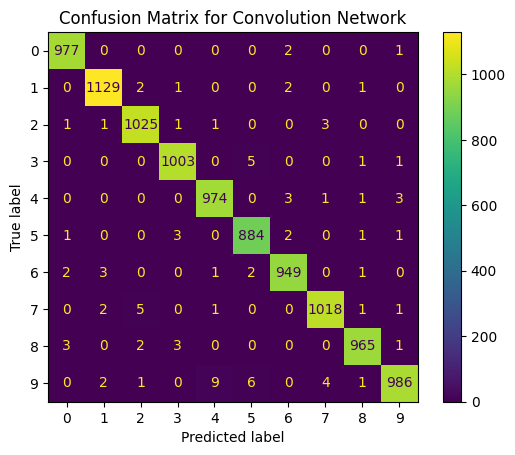

In [29]:
ConfusionMatrixDisplay(cm).plot()
plt.title('Confusion Matrix for Convolution Network')
plt.show()

## What Estimates Are Not Correct

Looking at 5 of the digits the model got wrong, some of these digits are not very legible. I can see how the model might confuse these digits as many are hard for a human to read. For many of the wrong predictions, the probability the model is assigning to its prediction is fairly low. This idicates it is not very sure for these predictions. For the ones it does assign a high probability, it is easy to see what patterns the model might be picking up on. For example, the 2 that was predicted as a 7 is very straight like a 7 and only has a small curl indicating it may not actually be one. Overall it seems the model is doing well. 

In [32]:
not_correct = predictions != y_test
first_5_wrong = x_test[not_correct][:5]

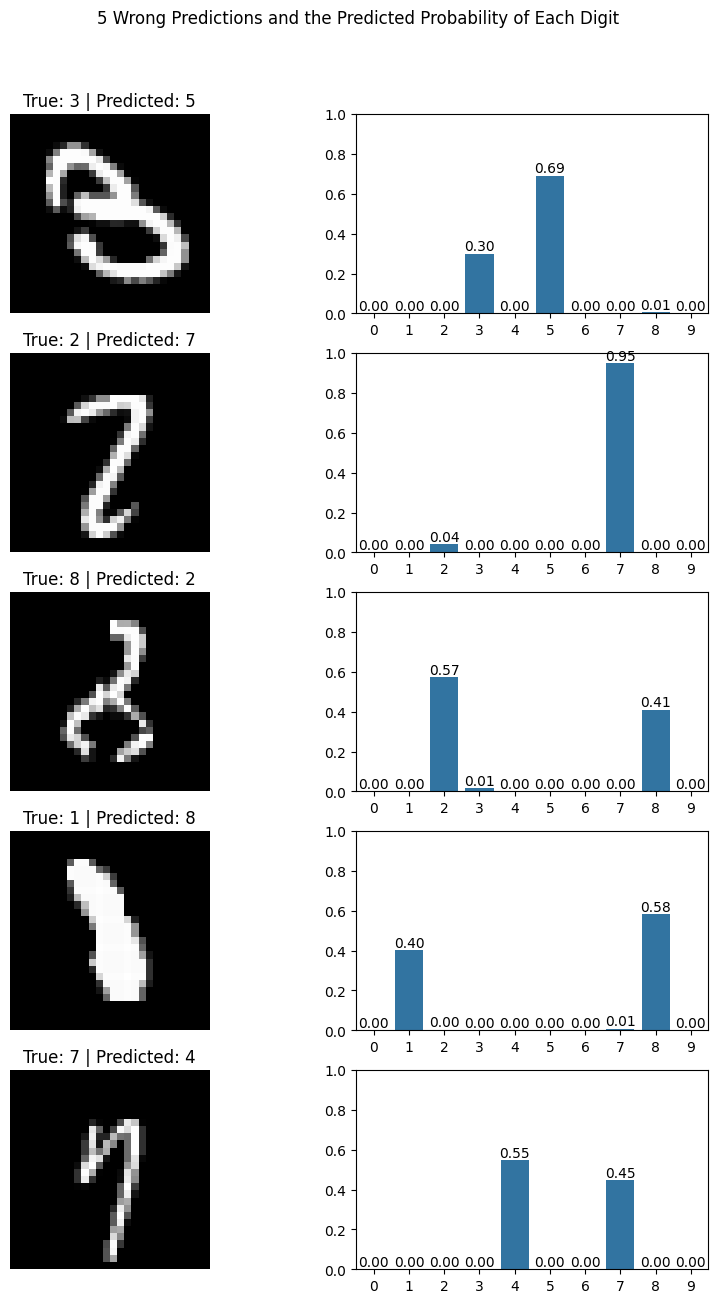

In [34]:
fig, axs = plt.subplots(figsize=(10, 15), nrows=5, ncols=2)
plt.suptitle('5 Wrong Predictions and the Predicted Probability of Each Digit', y=0.95, x=0.55)

for i in range(5):
    axs[i][0].set_axis_off()
    axs[i][0].imshow(first_5_wrong[i], cmap='gray')
    axs[i][0].set_title('True: ' + str(y_test[not_correct][i]) + ' | Predicted: ' + str(predictions[not_correct][i]))
    
    axs[i][1].set_ylim([0, 1])
    sns.barplot(x=range(10), y=probabilities[not_correct][i], ax=axs[i][1])
    axs[i][1].bar_label(axs[i][1].containers[0], fmt='%.2f')
    
plt.show()

## Just for Fun

I am using the model to predict some handwritten digits I wrote. 

In [18]:
# load images as numpy arrays
images = []
for file in os.listdir('my_digits'):
    img = Image.open('my_digits/' + file).convert('L')
    img = np.asarray(img) / 255
    images.append(img) 

In [19]:
# Add channel dimension

images = np.array(images)
images_expanded = np.expand_dims(images, -1)

In [20]:
# 10, 28 by 28 images with 1 channel
images_expanded.shape

(10, 28, 28, 1)

In [21]:
predictions = conv_model.predict(images_expanded)
probabilities = tf.nn.softmax(predictions).numpy()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


In [22]:
# see predictions 

num_predicted = probabilities.argmax(axis=-1)
print('Predicted:', num_predicted)

Predicted: [8 5 4 9 1 7 6 3 2 0]


## Plotting Predictions

As we can see, the model predicted each of my digits correctly which is reassuring. The model is also assigning high probabilities to its predictions which is good. 

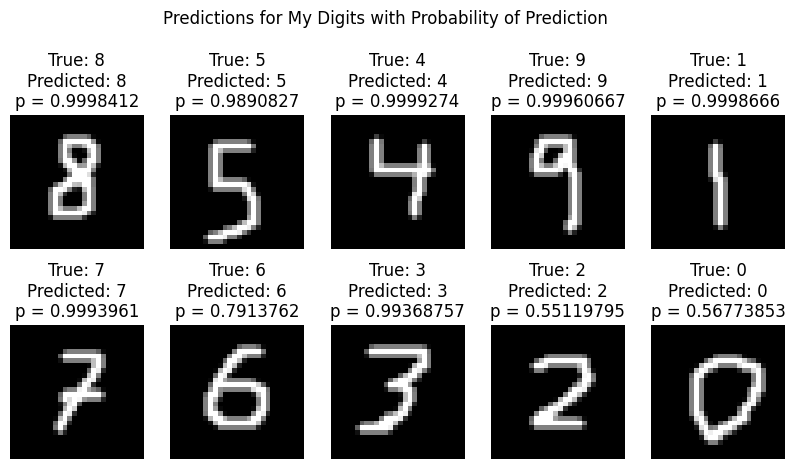

In [23]:
true_nums = [8, 5, 4, 9, 1, 7, 6, 3, 2, 0]

fig, axs = plt.subplots(figsize=(10, 5), nrows=2, ncols=5)
plt.suptitle('Predictions for My Digits with Probability of Prediction', y = 1.05)
for i in range(len(images)):
    row = i // 5
    col = i % 5
    curr_axis = axs[row][col]

    curr_axis.set_axis_off()
    curr_axis.imshow(images[i], cmap='gray')
    curr_axis.set_title('True: ' + str(true_nums[i]) + '\nPredicted: ' 
                        + str(num_predicted[i]) + '\np = ' 
                        + str(probabilities[num_predicted[i]].max()))

plt.show()